# Assignment 1
## Steve Cheney
### RBIF110



## Question 1

In [2]:
%pip install pandas
%pip install rdkit
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached rdkit-2024.9.4-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached rdkit-2024.9.4-cp311-cp311-win_amd64.whl (22.4 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Stephen\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\rdkit\\rdBase.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import AllChem
from rdkit.Chem import SaltRemover
import numpy as np
from rdkit.DataStructs import FingerprintSimilarity
from rdkit import RDLogger
from rdkit.Chem import PandasTools
from rdkit import DataStructs


### 1a. How many rows are in this file?

In [4]:
file_path = 'CHEMBL25-dataset.csv.gz'

# Read the compressed CSV file
data = pd.read_csv(file_path, compression='gzip', sep=';')

print(f'1a. Number of rows in the file: {len(data)}')

1a. Number of rows in the file: 1879206


### 1b. How many are classified as “small molecule”?

In [5]:
print(data.columns)

small_molecule_count = (data['Type'] == 'Small molecule').sum()

print(f"1b. Number of Small molecules: {small_molecule_count} ({(small_molecule_count/len(data) * 100):.3f}%)")

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP', 'PSA', 'HBA',
       'HBD', '#RO5 Violations', '#Rotatable Bonds', 'Passes Ro3',
       'QED Weighted', 'ACD ApKa', 'ACD BpKa', 'ACD LogP', 'ACD LogD',
       'Aromatic Rings', 'Structure Type', 'Inorganic Flag', 'Heavy Atoms',
       'HBA Lipinski', 'HBD Lipinski', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Molecular Species',
       'Molecular Formula', 'Smiles'],
      dtype='object')
1b. Number of Small molecules: 1849655 (98.427%)


### 1c. How are the molecules represented?


1. **ChEMBL ID**: A unique identifier for each molecule (e.g., `CHEMBL3214695`).
2. **Name**: The chemical name or common name (e.g., `GLPG-0555`).
3. **Synonyms**: Alternate names for the molecule (e.g., `GLPG-0555`).
4. **Type**: Describes the type of molecule, such as `"Small molecule"`.
5. **Molecular Weight**: The molecular weight of the compound (e.g., `392.91`).
6. **Molecular Formula**: The chemical formula of the molecule (e.g., `C18H21ClN4O2S`).
7. **SMILES**: A text-based representation of the molecule's structure (`SMILES` notation) (e.g., `CCN1CCc2c...`).
8. **Structure Type**: Indicates how the structure is defined (e.g., `MOL` or `NONE`).

### 1d. Are there duplicates? How many?

In [6]:
# Count the number of duplicate ChEMBL IDs
duplicate_chembl_count = data['ChEMBL ID'].duplicated().dropna().sum()
print(f"Number of duplicate ChEMBL IDs: {duplicate_chembl_count}")
# Count the number of duplicate Names
duplicate_name_count = data['Name'].duplicated().dropna().sum()
print(f"Number of duplicate Names: {duplicate_name_count}")
# Count the number of duplicate SMILES entries (ignoring missing values)
duplicate_smiles_count = data['Smiles'].duplicated().dropna().sum()
print(f"Number of duplicate SMILES: {duplicate_smiles_count}")

Number of duplicate ChEMBL IDs: 0
Number of duplicate Names: 1836031
Number of duplicate SMILES: 8895


### 1e. Is seliciclib in this dataset?

In [7]:
# From ChEMBL:
# ID: CHEMBL14762
# Name: SELICICLIB
# Molecular Formula: C19H26N6O
# SMILES: CC[C@H](CO)Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1

search_criteria = {
    'ChEMBL ID': 'CHEMBL14762',
    'Name': 'SELICICLIB',
    'Molecular Formula': 'C19H26N6O',
    'Smiles': 'CC[C@H](CO)Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1'
}

matching_entry = data[
    (data['ChEMBL ID'] == search_criteria['ChEMBL ID'])
    & (data['Name'].str.lower() == search_criteria['Name'].lower())
    # & (data['Molecular Formula'] == search_criteria['Molecular Formula'])
    # & (data['Smiles'] == search_criteria['Smiles'])
]

if not matching_entry.empty:
    print("Matching entry found:")
    print(matching_entry)
else:
    print("No matching entry found.")

Matching entry found:
          ChEMBL ID        Name                     Synonyms            Type  \
788837  CHEMBL14762  SELICICLIB  AL-39256|CYC-202|SELICICLIB  Small molecule   

        Max Phase  Molecular Weight  Targets  Bioactivities  AlogP    PSA  \
788837          2            354.46      894         2149.0    3.2  87.89   

        ...  Structure Type  Inorganic Flag  Heavy Atoms  HBA Lipinski  \
788837  ...             MOL               0         26.0           7.0   

       HBD Lipinski  #RO5 Violations (Lipinski)  \
788837          3.0                         0.0   

        Molecular Weight (Monoisotopic)  Molecular Species  Molecular Formula  \
788837                         354.2168            NEUTRAL          C19H26N6O   

                                              Smiles  
788837  CC[C@H](CO)Nc1nc(NCc2ccccc2)c3ncn(C(C)C)c3n1  

[1 rows x 31 columns]


Intestingly, while the ChEMBL ID and the name of the drug is found within our dataset here, the SMILES string according to [the online ChEMBL database](https://www.ebi.ac.uk/chembl/explore/compound/CHEMBL14762) is slightly different that what's found in our dataset.

## Question 2

### 2a. Construct a workflow to produce RDkit fingerprints from appropriate column in the dataset. Which fingerprints and why (explain your selection)?
### 2b. What are the pre-processing steps that should be used before fingerprinting digital molecules? (1 point)
### 2c. What fingerprint depth did you use? What are the implications?
### 2e. Find the 3 most similar compounds to Seliciclib from the dataset using three different sets of parameters of your choice. Explain your choices.

In [11]:
def standardize_smiles(smiles):
    '''This function takes a non-canonical SMILES and
    returns the canonical version

    Args:
        -smiles: str, non-canonical SMILES of a molecule

    Out:
        - canonical_smiles: str, canonical SMILES of the molecule
    '''

    # Handle any issues with missing values
    if not isinstance(smiles, str) or smiles.strip() == "" or pd.isna(smiles):
        return None
    
    mol = Chem.MolFromSmiles(smiles) #create a mol object from input smiles


    largest_Fragment = rdMolStandardize.LargestFragmentChooser()    
    standardized_smiles = largest_Fragment.choose(mol) #standardize the input string by taking the largest fragment

    canonical_smiles = Chem.MolToSmiles(standardized_smiles) #convert the previous mol object to SMILES using Chem.MolToSmiles()

    ####END
    return canonical_smiles

def get_standard_mol(smiles):
    '''This function takes a non-canonical SMILES converts to the canonical version, then returns the mol object

    Args:
        -smiles: str, non-canonical SMILES of a molecule

    Out:
        - obj: mol object of the converted canonical molecule
    '''
    
    if smiles is None:
        return None

    try:
        mol_obj = Chem.MolFromSmiles(standardize_smiles(smiles))
        return mol_obj if mol_obj else None
    except:
        return None

def get_fingerprint(mol, radius=2, bits=1024):
    if mol is None:
        return None  # Prevents passing None to the RDKit function
    
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=bits)

# Suppress RDKit warnings and informational messages
RDLogger.DisableLog('rdApp.*')  # Disables all RDKit logging messages

def clean_df_and_create_mol_col(df, smilesCol, molCol, subset_len=-1, remove_na=True):

    if subset_len == -1:
        data_subset = df.copy()
    else:
        data_subset = df.iloc[:subset_len].copy()

    # Clean data
    data_subset = data_subset[data_subset[smilesCol].notna()]  # Remove NaN values
    data_subset[smilesCol] = data_subset[smilesCol].astype(str)  # Ensure all values are strings

    PandasTools.AddMoleculeColumnToFrame(data_subset, smilesCol=smilesCol, molCol=molCol)

    return data_subset


# Clean the data to ignore any NaN smiles values and subset data if needed
data_subset = clean_df_and_create_mol_col(data, 'Smiles', 'rdkit_mol')
# Get the standardized mol object from the standard SMILES
data_subset['standardized_mol'] = data_subset['Smiles'].apply(get_standard_mol)
# Get the fingerprint
data_subset['fingerprint'] = data_subset['standardized_mol'].apply(get_fingerprint)
data_subset.head()

ChEMBL ID                      Name                  Synonyms  \
2  CHEMBL4116853                       NaN                       NaN   
5  CHEMBL4117318                       NaN                       NaN   
6  CHEMBL4116337                       NaN                       NaN   
7  CHEMBL2105851  BISDEQUALINIUM DIACETATE  BISDEQUALINIUM DIACETATE   
8  CHEMBL3991223                       NaN                       NaN   

             Type  Max Phase  Molecular Weight  Targets  Bioactivities  AlogP  \
2  Small molecule          0            392.91        0            NaN   3.20   
5  Small molecule          0            498.45        0            NaN   6.35   
6  Small molecule          0            524.45        0            NaN   5.27   
7  Small molecule          0            713.02        0            NaN   9.96   
8  Small molecule          0            447.90        0            NaN   3.09   

      PSA  ...  HBA Lipinski  HBD Lipinski  #RO5 Violations (Lipinski)  \
2   87.46  ...           6.0           4.0                         0.0   
5   44.81  ...           5.0           1.0                         1.0   
6  116.95  ...           8.0           4.0                         2.0   
7   31.82  ...           4.0           2.0                         2.0   
8   85.27  ...           8.0           1.0                         0.0   

   Molecular Weight (Monoisotopic) Molecular Species  Molecular Formula  \
2                         392.1074           NEUTRAL      C18H21ClN4O2S   
5                         497.1637           NEUTRAL      C27H29Cl2N3O2   
6                         523.0790              BASE       C23H22BrN7OS   
7                         594.4651           NEUTRAL         C44H64N4O4   
8                         447.1473           NEUTRAL      C21H23ClFN5O3   

                                              Smiles  \
2      CCN1CCc2c(C1)sc(NC(=O)NCc3cccc(Cl)c3)c2C(=O)N   
5  Clc1cccc(N2CCN(CCCCNC(=O)Oc3ccc(cc3)c4ccccc4)C...   
6  NC(=N)N1CCC[C@H]1Cc2onc(n2)c3ccc(Nc4nc(cs4)c5c...   
7  CC(=O)[O-].CC(=O)[O-].Cc1cc2NCCCCCCCCCCNc3cc(C...   
8  CC(N1CC(C1)Oc2c(F)cccc2Cl)C3=Nc4c(cnn4C5CCOCC5...   

                                           rdkit_mol  \
2  <rdkit.Chem.rdchem.Mol object at 0x000002230A5...   
5  <rdkit.Chem.rdchem.Mol object at 0x000002230A5...   
6  <rdkit.Chem.rdchem.Mol object at 0x00000223428...   
7  <rdkit.Chem.rdchem.Mol object at 0x00000223428...   
8  <rdkit.Chem.rdchem.Mol object at 0x00000223428...   

                                    standardized_mol  \
2  <rdkit.Chem.rdchem.Mol object at 0x000002230A5...   
5  <rdkit.Chem.rdchem.Mol object at 0x0000022DD7B...   
6  <rdkit.Chem.rdchem.Mol object at 0x0000022DD7B...   
7  <rdkit.Chem.rdchem.Mol object at 0x0000022DD7B...   
8  <rdkit.Chem.rdchem.Mol object at 0x0000022DD7B...   

                                         fingerprint  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
6  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
8  [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...  

[5 rows x 34 columns]

In [12]:
data_subset.to_pickle('fingerprint_data.pkl')


In [22]:
# Set up seliciclib for comparison
#seliciclib_smiles = 'CC[C@H](CO)Nc1nc(NCc2ccccc2)c3ncn(C(C)C)c3n1'
#seliciclib = get_standard_mol(seliciclib_smiles)

seliciclib_fp = data_subset.loc[data_subset['ChEMBL ID'] == "CHEMBL14762", 'fingerprint'].iloc[0]
print(seliciclib_fp)

# Calculate the similarity of each fingerprint to seliciclib_fp and store results in a new column
data_subset['similarity'] = data_subset['fingerprint'].apply(
    lambda fp: DataStructs.FingerprintSimilarity(seliciclib_fp, fp) if fp is not None else 0
)

# Sort the DataFrame by similarity and get the top 5 most similar compounds
top_5_similar = data_subset[data_subset['ChEMBL ID'] != "CHEMBL14762"].sort_values(by='similarity', ascending=False).head(5)

# Return the 'Name' column of the top 5 results
top_5_ids = top_5_similar['ChEMBL ID'].tolist()
top_5_names = top_5_similar['Name'].tolist()

print("Top 5 most similar compounds:")
print(top_5_ids)
print(top_5_names)

Top 5 most similar compounds:
['CHEMBL133342', 'CHEMBL52387', 'CHEMBL461557', 'CHEMBL131697', 'CHEMBL2111870']
['(S)-ROSCOVITINE', '(RS)-ROSCOVITINE', nan, nan, nan]


In [23]:
bit_list = [64, 128, 256, 512, 1024]
new_fp_data = data_subset.copy()
for bit in bit_list:
    new_fp_data[f'fingerprint_{bit}'] = new_fp_data['standardized_mol'].apply(lambda mol: get_fingerprint(mol, radius=2, bits=bit))


In [27]:
def rank_fingerprints(chemblid):
    fp_bits = ['fingerprint_64', 'fingerprint_128', 'fingerprint_256', 'fingerprint_512', 'fingerprint_1024', 'fingerprint']

    for fp_bit in fp_bits:

        fp_to_compare = new_fp_data.loc[new_fp_data['ChEMBL ID'] == chemblid, fp_bit].iloc[0]

        # Calculate the similarity of each fingerprint to seliciclib_fp and store results in a new column
        new_fp_data['similarity'] = new_fp_data[fp_bit].apply(
            lambda fp: DataStructs.FingerprintSimilarity(fp_to_compare, fp) if fp is not None else 0
        )

        # Sort the DataFrame by similarity and get the top 5 most similar compounds
        top_3_similar = new_fp_data[new_fp_data['ChEMBL ID'] != chemblid].sort_values(by='similarity', ascending=False).head(3)

        # Return the 'Name' column of the top 3 results
        top_3_ids = top_3_similar['ChEMBL ID'].tolist()
        top_3_names = top_3_similar['Name'].tolist()

        print(f"Top 3 most similar compounds ({fp_bit}):")
        #print(top_3_ids)
        #print(top_3_names)
        print(f"({top_3_ids[0]}, {top_3_names[0]}); ({top_3_ids[1]}, {top_3_names[1]}); ({top_3_ids[2]}, {top_3_names[2]})")

rank_fingerprints("CHEMBL14762")

Top 3 most similar compounds (fingerprint_64):
(CHEMBL133342, (S)-ROSCOVITINE); (CHEMBL52387, (RS)-ROSCOVITINE); (CHEMBL461557, nan)
Top 3 most similar compounds (fingerprint_128):
(CHEMBL52387, (RS)-ROSCOVITINE); (CHEMBL133342, (S)-ROSCOVITINE); (CHEMBL461557, nan)
Top 3 most similar compounds (fingerprint_256):
(CHEMBL133342, (S)-ROSCOVITINE); (CHEMBL52387, (RS)-ROSCOVITINE); (CHEMBL461557, nan)
Top 3 most similar compounds (fingerprint_512):
(CHEMBL133342, (S)-ROSCOVITINE); (CHEMBL52387, (RS)-ROSCOVITINE); (CHEMBL461557, nan)
Top 3 most similar compounds (fingerprint_1024):
(CHEMBL133342, (S)-ROSCOVITINE); (CHEMBL52387, (RS)-ROSCOVITINE); (CHEMBL461557, nan)
Top 3 most similar compounds (fingerprint):
(CHEMBL133342, (S)-ROSCOVITINE); (CHEMBL52387, (RS)-ROSCOVITINE); (CHEMBL461557, nan)


The workflow I created for generating RDKit fingerprints begins with standardizing the molecular representation through the `standardize_smiles` function, which ensures that molecules are represented consistently. This step avoids redundancy due to different notations for the same molecule. The `clean_df_and_create_mol_col` function further preprocesses the data by handling missing values and converting SMILES strings to RDKit Mol objects. Fingerprints are generated using the `get_fingerprint` function, specifically the Morgan fingerprint, also known as the extended connectivity fingerprint (ECFP) [1]. I chose Morgan fingerprints due to their effectiveness in representing molecular structures for similarity analysis and their wide usage in cheminformatics (as well as because they were one of the useful examples in the topic notes). The circular nature of Morgan fingerprints captures topological features and molecular fragments, making them ideal for comparing small molecule libraries in drug discovery. This workflow was validated across different fingerprint sizes, ranging from 64 to 2048 bits, to assess how varying fingerprint depth affects the similarity ranking [2].

Regarding fingerprint depth, multiple bit lengths (64, 128, 256, 512, 1024, and 2048 denoted as just `fingerprint`) were tested. Higher bit depths generally offer more detailed molecular descriptions, reducing the risk of hash collisions but potentially leading to sparsity in the data. The consistent top results across varying bit sizes in this analysis indicate that increasing fingerprint depth beyond 256 bits did not significantly alter the rankings, suggesting diminishing returns for this dataset. Selecting the optimal fingerprint depth balances capturing sufficient structural information while avoiding excessive computational cost and data sparsity [2].

One thing of note I found during this excercise was how long it took to process the data across this dataset. It took almost 45 minutes to run the initial preprocessing steps and an additional 50 minutes to add in the extra fingerprint sizes to the data. For the sake of future work, I saved the preprocessed data (without the additional fingerprints) to a PKL file, a very common python data file that keeps ojects stored in place, since my dataframe contained multiple RDKit objects.

1. https://www.rdkit.org/docs/GettingStartedInPython.html#id13
2. Capecchi, A., Probst, D. & Reymond, JL. One molecular fingerprint to rule them all: drugs, biomolecules, and the metabolome. J Cheminform 12, 43 (2020). https://doi.org/10.1186/s13321-020-00445-4

### 2d. Is there chiral information in this dataset?

In [30]:
len(data_subset[data_subset['Smiles'].str.contains('@')])


482038

There is chiral information in this dataset if we were to take a look at our SMILES strings. Since the `@` symbol indicates a chiral carbon, we can see that there are `482038` entries that contain at least one chiral carbon.

### 2f. Generate a report about the different sets of results. What do these molecules target? How are the different or similar?

In [34]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

# Define the descriptors you want to calculate
descriptors = [
    'TPSA',
    'MolLogP',
    'NumHAcceptors',
    'NumHDonors',
    'RingCount',
    'NumAromaticHeterocycles'
]

calculator = MolecularDescriptorCalculator(descriptors)

# Filter the DataFrame for the specified ChEMBL IDs
selected_chembl_ids = ['CHEMBL133342', 'CHEMBL52387', 'CHEMBL461557']
selected_mols = data_subset[(data_subset['ChEMBL ID'].isin(selected_chembl_ids)) & (data_subset['standardized_mol'].notna())]

# Calculate descriptors only for the selected valid molecules
properties = selected_mols['standardized_mol'].apply(lambda mol: calculator.CalcDescriptors(mol))

df_properties = pd.DataFrame(properties.tolist(), columns=descriptors, index=selected_mols['ChEMBL ID'].values)

df_properties

TPSA  MolLogP  NumHAcceptors  NumHDonors  RingCount  \
CHEMBL52387   87.89   3.2021              7           3          3   
CHEMBL133342  87.89   3.2021              7           3          3   
CHEMBL461557  87.89   4.8691              7           3          4   

              NumAromaticHeterocycles  
CHEMBL52387                         2  
CHEMBL133342                        2  
CHEMBL461557                        2

Roscovitine, a widely studied CDK inhibitor available in both (R)- and (S)-enantiomeric forms which are shown here as `(CHEMBL133342, (S)-ROSCOVITINE) and (CHEMBL52387, (RS)-ROSCOVITINE)`, have demonstrated a reduction in brain lesions in models of both global and focal cerebral ischemia. The (S)-isomer of roscovitine, in particular, has been shown to reduce brain damage by modulating NVU responses to ischemia, including inflammation and cellular protection. Additionally, roscovitine has been effective in decreasing leukocyte-mediated inflammation in other inflammatory conditions. CDKs, specifically CDK1, CDK2, CDK5, CDK7, and CDK9, have been identified as key players in the inflammatory responses of NVU cells and leukocytes following brain injury, highlighting roscovitine's therapeutic potential.

The beneficial effects of both (R)- and (S)-roscovitine in ischemic stroke models are well-documented. (S)-roscovitine has been shown to reduce brain edema and infarct volume, with protective effects linked to decreased neuronal death, preservation of the blood-brain barrier (BBB), endothelial protection, reduced microglial proliferation, and attenuation of astrocyte reactivity. (R)-roscovitine has also demonstrated activity on NVU cells and leukocytes in non-ischemic models. Specific inhibition of CDK1, CDK2, CDK5, CDK7, and CDK9, roscovitine's primary targets, reveals their involvement in multiple inflammatory pathways within both NVU cells and leukocytes during cerebral ischemia.

The differences between the molecules `CHEMBL52387`, `CHEMBL133342`, and `CHEMBL461557` can be observed through their physicochemical properties, which may influence their biological activity and therapeutic potential in ischemic stroke models. Both CHEMBL52387 (RS-roscovitine) and CHEMBL133342 (S-roscovitine) share identical properties with a total polar surface area (TPSA) of 87.89, a logP value of 3.20, seven hydrogen bond acceptors, three hydrogen bond donors, three rings, and two aromatic heterocycles. Their structural similarity suggests they have comparable aqueous solubility and membrane permeability, factors that are critical for effective blood-brain barrier (BBB) penetration in neurological therapies. The primary distinction between these two molecules is their stereochemistry, with CHEMBL133342 representing the pure (S)-enantiomer and CHEMBL52387 being the racemic mixture.

In contrast, CHEMBL461557 exhibits a higher logP value (4.87), indicating increased lipophilicity compared to the other two molecules. This difference could affect its pharmacokinetic properties, such as enhanced membrane permeability but potentially lower aqueous solubility. Additionally, CHEMBL461557 has a higher ring count (4) while maintaining the same TPSA (87.89) and hydrogen bonding profile as the other two molecules, suggesting a slightly bulkier structure that could influence its interaction with CDK binding sites. Despite these structural variations, all three molecules support the cited hypothesis that each compound could contribute to reducing brain inflammation and tissue damage following ischemic stroke, with differences in stereochemistry and lipophilicity potentially influencing their therapeutic efficiency and bioavailability.

Le Roy, L., Letondor, A., Le Roux, C., Amara, A., & Timsit, S. (2021). Cellular and Molecular Mechanisms of R/S-Roscovitine and CDKs Related Inhibition under Both Focal and Global Cerebral Ischemia: A Focus on Neurovascular Unit and Immune Cells. Cells, 10(1), 104. https://doi.org/10.3390/cells10010104

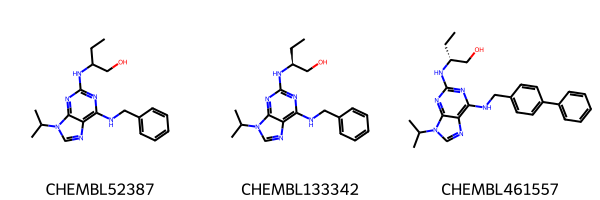

In [35]:
CHEMBL52387 = data_subset.loc[data_subset['ChEMBL ID'] == 'CHEMBL52387', 'standardized_mol'].iloc[0]
CHEMBL133342 = data_subset.loc[data_subset['ChEMBL ID'] == 'CHEMBL133342', 'standardized_mol'].iloc[0]
CHEMBL461557 = data_subset.loc[data_subset['ChEMBL ID'] == 'CHEMBL461557', 'standardized_mol'].iloc[0]

mols = [CHEMBL52387, CHEMBL133342, CHEMBL461557]
names = ['CHEMBL52387', 'CHEMBL133342', 'CHEMBL461557']

grid = Draw.MolsToGridImage(mols , legends=names)

grid